In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
import pickle

In [2]:
raw_df = pd.read_csv('./venom.tsv', sep='\t')

In [32]:
raw_df['Protein families'].head()

0                             Conotoxin I2 superfamily
1                                                  NaN
2    Venom metalloproteinase (M12B) family, P-II su...
3    Venom metalloproteinase (M12B) family, P-II su...
4    Venom metalloproteinase (M12B) family, P-II su...
Name: Protein families, dtype: object

In [33]:
len(raw_df['Protein families'].unique())

608

In [3]:
families_raw = list(raw_df['Protein families'].unique())
families_raw

['Conotoxin I2 superfamily',
 nan,
 'Venom metalloproteinase (M12B) family, P-II subfamily, P-IIa sub-subfamily',
 'Venom metalloproteinase (M12B) family, P-II subfamily, P-IIe sub-subfamily',
 'Venom metalloproteinase (M12B) family, P-II subfamily',
 'Venom metalloproteinase (M12B) family, P-III subfamily',
 'Venom metalloproteinase (M12B) family, P-III subfamily, P-IIIb sub-subfamily',
 'Venom metalloproteinase (M12B) family, P-II subfamily, P-IId sub-subfamily',
 'Venom metalloproteinase (M12B) family, P-III subfamily, P-IIIa sub-subfamily',
 'Venom metalloproteinase (M12B) family, P-III subfamily, P-IIIc sub-subfamily',
 'Venom metalloproteinase (M12B) family, P-II subfamily, P-IIb sub-subfamily',
 'Venom metalloproteinase (M12B) family, P-II subfamily, P-IIc sub-subfamily',
 'Venom metalloproteinase (M12B) family',
 'Venom metalloproteinase (M12B) family, P-III subfamily, P-IIId sub-subfamily',
 'Venom metalloproteinase (M12B) family, P-I subfamily',
 'Limacoditoxin-1 (ACP-like) f

In [4]:
families_raw[1] = 'No'

In [5]:
families_list = []
# Truncates protein family names to the family level, discarding subfamily information for simplification and grouping.
for record in families_raw:
        family = record.split(' family')[0] + ' family'
        families_list.append(family)

families_list

['Conotoxin I2 superfamily family',
 'No family',
 'Venom metalloproteinase (M12B) family',
 'Venom metalloproteinase (M12B) family',
 'Venom metalloproteinase (M12B) family',
 'Venom metalloproteinase (M12B) family',
 'Venom metalloproteinase (M12B) family',
 'Venom metalloproteinase (M12B) family',
 'Venom metalloproteinase (M12B) family',
 'Venom metalloproteinase (M12B) family',
 'Venom metalloproteinase (M12B) family',
 'Venom metalloproteinase (M12B) family',
 'Venom metalloproteinase (M12B) family',
 'Venom metalloproteinase (M12B) family',
 'Venom metalloproteinase (M12B) family',
 'Limacoditoxin-1 (ACP-like) family',
 'Xibalbin-2 family',
 'Xibalbin-13 family',
 'Xibalbin-1 family',
 'Three-finger toxin family',
 'Three-finger toxin family',
 'Three-finger toxin family',
 'Three-finger toxin family',
 'Three-finger toxin family',
 'Bradykinin-related peptide family',
 'Short scorpion toxin superfamily, Potassium channel inhibitor kappa-KTx family',
 'Venom waprin family',
 'Ve

In [6]:
families_set = set(families_list)
len(families_set)

308

In [38]:
families_set

{"5'-nucleotidase family",
 'AB hydrolase superfamily, Lipase family',
 'ATP:guanido phosphotransferase family',
 'AVIT (prokineticin) family',
 'Acrorhagin I family',
 'Actinoporin family',
 'Ant myrmeciitoxin-01 family',
 'Ant venom allergen 2/4 family',
 'Arthropod CHH/MIH/GIH/VIH hormone family',
 'Arthropod phospholipase D family',
 'Asilidin-1 family',
 'Asilidin-12 family',
 'Beta-defensin family',
 'Bradykinin inhibitor peptide family',
 'Bradykinin-potentiating peptide family',
 'Bradykinin-related peptide family',
 'CART family',
 'CREC family',
 'CRISP family',
 'Calmodulin family',
 'Caterpillar 1 family',
 'Caterpillar 11 family',
 'Caterpillar 2 family',
 'Caterpillar 3 family',
 'Caterpillar 4 family',
 'Caterpillar 8 family',
 'Caterpillar 9 family',
 'Cathelicidin family',
 'Cationic peptide 01 (latrotoxin) family',
 'Cationic peptide 02 (oxyopinin-2) family',
 'Cationic peptide 03 (latarcin) family',
 'Cationic peptide 04 (cupiennin) family',
 'Cationic peptide 06 (cy

In [39]:
test_df = raw_df.sample(20).copy()
test_df

,Entry,Reviewed,Entry Name,Protein names,Organism,Length,Protein families,Taxonomic lineage
3154,P51528,reviewed,PA1_VESMC,Phospholipase A1 (PLA1) (EC 3.1.1.32) (Allerge...,Vespula maculifrons (Eastern yellow jacket) (W...,300,"AB hydrolase superfamily, Lipase family","cellular organisms (no rank), Eukaryota (domai..."
4548,Q7Z096,reviewed,I1BC_CONRA,Iota-conotoxin-like r11c (R11.4),Conus radiatus (Rayed cone),80,Conotoxin I1 superfamily,"cellular organisms (no rank), Eukaryota (domai..."
5068,C0JAX3,reviewed,A1MA1_LOXDE,Dermonecrotic toxin LdSicTox-alphaIB3ai (EC 4....,Loxosceles deserta (Desert recluse spider),273,"Arthropod phospholipase D family, Class II sub...","cellular organisms (no rank), Eukaryota (domai..."
1910,C1IC48,reviewed,3S14_WALAE,Three-finger toxin W-IV,Walterinnesia aegyptia (Desert black snake),83,"Three-finger toxin family, Short-chain subfami...","cellular organisms (no rank), Eukaryota (domai..."
3556,D9U297,reviewed,SNA1_LYCMC,Neurotoxin LmNaTx1,Lychas mucronatus (Chinese swimming scorpion),86,"Long (4 C-C) scorpion toxin superfamily, Sodiu...","cellular organisms (no rank), Eukaryota (domai..."
3411,P0C831,reviewed,O166_CONST,Omega-conotoxin-like S6.6,Conus striatus (Striated cone),72,Conotoxin O1 superfamily,"cellular organisms (no rank), Eukaryota (domai..."
6778,C0HLR6,reviewed,SCX1_RHOCR,Beta-toxin Rc1,Rhopalurus crassicauda (Scorpion),49,"Long (4 C-C) scorpion toxin superfamily, Sodiu...","cellular organisms (no rank), Eukaryota (domai..."
3885,P0DV95,reviewed,TX1_HETPN,Mu-Sparatoxin-Hp1 (HptTx-208),Heteropoda pingtungensis (Pingtung huntsman sp...,84,Neurotoxin 10 (Hwtx-1) family,"cellular organisms (no rank), Eukaryota (domai..."
6009,Q9BH86,reviewed,CT14_CONPE,Conotoxin Pn-014 (Pn-B01131),Conus pennaceus (Feathered cone) (Conus episco...,62,Conotoxin T superfamily,"cellular organisms (no rank), Eukaryota (domai..."
4672,D2Y2N9,reviewed,H18E1_CYRHA,Hainantoxin-XVIII-5 (HNTX-XVIII-5),Cyriopagopus hainanus (Chinese bird spider) (H...,109,"Neurotoxin 25 family, F7 subfamily","cellular organisms (no rank), Eukaryota (domai..."


In [7]:
def simplify_family(df, fam_set):
    df['prot_fams_simp'] = df['Protein families'].copy()
    for family in fam_set:
        for index, row in df.iterrows():
            if family in str(row['prot_fams_simp']):
                df.at[index, 'prot_fams_simp'] = family

In [41]:
simplified_df = raw_df.copy()
simplify_family(simplified_df, families_set)

In [42]:
simplified_df.head()

,Entry,Reviewed,Entry Name,Protein names,Organism,Length,Protein families,Taxonomic lineage,prot_fams_simp
0,P69499,reviewed,I2_CONST,conotoxin S11.3,Conus striatus (Striated cone),68,Conotoxin I2 superfamily,"cellular organisms (no rank), Eukaryota (domai...",Conotoxin I2 superfamily
1,P0DUS0,reviewed,PRCT_TITSE,[des-Arg1]-proctolin (NEP-inhibiting peptide),Tityus serrulatus (Brazilian scorpion),4,NaN,"cellular organisms (no rank), Eukaryota (domai...",NaN
2,C0HLL1,reviewed,VM2CD_CRODU,Zinc metalloproteinase/disintegrin-like CdtV1 ...,Crotalus durissus terrificus (South American r...,32,"Venom metalloproteinase (M12B) family, P-II su...","cellular organisms (no rank), Eukaryota (domai...",Venom metalloproteinase (M12B) family
3,C0L2T8,reviewed,VM2C1_CRODO,Zinc metalloproteinase/disintegrin (Metallopro...,Crotalus durissus collilineatus (Brazilian rat...,478,"Venom metalloproteinase (M12B) family, P-II su...","cellular organisms (no rank), Eukaryota (domai...",Venom metalloproteinase (M12B) family
4,C9E1R9,reviewed,VM2V2_CROVV,Zinc metalloproteinase/disintegrin VMP-II [Cle...,Crotalus viridis viridis (Prairie rattlesnake),478,"Venom metalloproteinase (M12B) family, P-II su...","cellular organisms (no rank), Eukaryota (domai...",Venom metalloproteinase (M12B) family


In [43]:
pickle.dump(simplified_df, open('./pickles/simplified_data.pkl', 'wb'))

In [8]:
simplified_df = pickle.load(open('./pickles/simplified_data.pkl', 'rb'))
simplified_df.head()

,Entry,Reviewed,Entry Name,Protein names,Organism,Length,Protein families,Taxonomic lineage,prot_fams_simp
0,P69499,reviewed,I2_CONST,conotoxin S11.3,Conus striatus (Striated cone),68,Conotoxin I2 superfamily,"cellular organisms (no rank), Eukaryota (domai...",Conotoxin I2 superfamily
1,P0DUS0,reviewed,PRCT_TITSE,[des-Arg1]-proctolin (NEP-inhibiting peptide),Tityus serrulatus (Brazilian scorpion),4,NaN,"cellular organisms (no rank), Eukaryota (domai...",NaN
2,C0HLL1,reviewed,VM2CD_CRODU,Zinc metalloproteinase/disintegrin-like CdtV1 ...,Crotalus durissus terrificus (South American r...,32,"Venom metalloproteinase (M12B) family, P-II su...","cellular organisms (no rank), Eukaryota (domai...",Venom metalloproteinase (M12B) family
3,C0L2T8,reviewed,VM2C1_CRODO,Zinc metalloproteinase/disintegrin (Metallopro...,Crotalus durissus collilineatus (Brazilian rat...,478,"Venom metalloproteinase (M12B) family, P-II su...","cellular organisms (no rank), Eukaryota (domai...",Venom metalloproteinase (M12B) family
4,C9E1R9,reviewed,VM2V2_CROVV,Zinc metalloproteinase/disintegrin VMP-II [Cle...,Crotalus viridis viridis (Prairie rattlesnake),478,"Venom metalloproteinase (M12B) family, P-II su...","cellular organisms (no rank), Eukaryota (domai...",Venom metalloproteinase (M12B) family


In [45]:
simplified_df['prot_fams_simp'].isnull().sum()

np.int64(539)

In [46]:
simplified_df.query("`prot_fams_simp`.isnull() == True").sort_values('Protein names')

,Entry,Reviewed,Entry Name,Protein names,Organism,Length,Protein families,Taxonomic lineage,prot_fams_simp
7793,P84745,reviewed,VVP2_BOTJR,1095.6 Da venom vasodilator peptide,Bothrops jararacussu (Jararacussu),11,NaN,"cellular organisms (no rank), Eukaryota (domai...",NaN
7792,P84747,reviewed,VVP1_BOTMO,1370.6 Da venom vasodilator peptide,Bothrops moojeni (Lance-headed viper) (Caissaca),12,NaN,"cellular organisms (no rank), Eukaryota (domai...",NaN
7791,P84746,reviewed,VVP1_BOTJR,1370.6 Da venom vasodilator peptide,Bothrops jararacussu (Jararacussu),12,NaN,"cellular organisms (no rank), Eukaryota (domai...",NaN
7790,P83717,reviewed,VP239_HETSP,2.39 kDa venom peptide,Heterometrus spinifer (Asia giant forest scorp...,22,NaN,"cellular organisms (no rank), Eukaryota (domai...",NaN
7789,P83718,reviewed,VP24_HETSP,2.4 kDa venom peptide,Heterometrus spinifer (Asia giant forest scorp...,22,NaN,"cellular organisms (no rank), Eukaryota (domai...",NaN
...,...,...,...,...,...,...,...,...,...
232,P0C8B1,reviewed,DEFBL_ORNAN,Venom-like beta-defensin (DefB-vL) (Defensin-B...,Ornithorhynchus anatinus (Duckbill platypus),68,NaN,"cellular organisms (no rank), Eukaryota (domai...",NaN
218,P0DL40,reviewed,VESPI_VESMG,Vespin,Vespa magnifica (Hornet),67,NaN,"cellular organisms (no rank), Eukaryota (domai...",NaN
154,P0DXZ4,reviewed,TX1A_XYLAR,Xylotoxin(1)-Xa1a (XYTX(1)-Xa1a) (XYTX1-Xa1a),Xylocopa aruana (Great carpenter bee),52,NaN,"cellular organisms (no rank), Eukaryota (domai...",NaN
153,P0DXZ5,reviewed,TX2A_XYLAR,Xylotoxin(2)-Xa2a (XYTX(2)-Xa2a) (XYTX2-Xa2a),Xylocopa aruana (Great carpenter bee),56,NaN,"cellular organisms (no rank), Eukaryota (domai...",NaN


In [9]:
no_fam_prots_list = list(simplified_df.query("`prot_fams_simp`.isnull() == True").sort_values('Protein names')['Protein names'])
no_fam_prots_list

['1095.6 Da venom vasodilator peptide',
 '1370.6 Da venom vasodilator peptide',
 '1370.6 Da venom vasodilator peptide',
 '2.39 kDa venom peptide',
 '2.4 kDa venom peptide',
 '33kDa venom protein',
 'A-conotoxin cyclic Mila (A-CTX-cMila)',
 'Acatoxin 1 (Acatx1)',
 'Actin depolymerising venom protein gelsolin 1',
 'Alkaline phosphatase (EC 3.1.3.1)',
 'Alpha-actitoxin-Ms11a-1 (Alpha-AITX-Ms11a-1) (Alpha-anmTX-Ms11a-1)',
 'Alpha-actitoxin-Ms11a-2 (Alpha-AITX-Ms11a-2) (Alpha-anmTX-Ms11a-2)',
 'Alpha-actitoxin-Ms11a-3 (Alpha-AITX-Ms11a-3) (Alpha-anmTX-Ms11a-3)',
 'Alpha-actitoxin-Ms11a-4 (Alpha-AITX-Ms11a-4) (Alpha-anmTX-Ms11a-4)',
 'Alpha-conotoxin PrXA (Alpha-C-PrXA)',
 'Alpha-pompilidotoxin (Alpha-PMTX)',
 'Ampulexin 1 (Axn1)',
 'Ampulexin 2 (Axn2)',
 'Ampulexin 3 (Axn3)',
 'Anoplin (ANP) (As-183)',
 'Antimicrobial peptide scolopin-1',
 'Antimicrobial peptide scolopin-2',
 'Antioxidant protein SmP90',
 'Apamin',
 'Apamin (APM) (Apamine)',
 'As-peptide 126 (As-126) (As126)',
 'Astacin-lik

In [10]:
# In a more rigorous analysis, the proteins without scientifically accepted families would be dropped from the dataset.
# However, this dataset is small enough that preserving even some of these records is beneficial.

# Manually assigned artificial protein families based on proteins with similar names to group proteins without defined families.
# These were generated from substrings of protein names that would group proteins from at least 2 species together.
# To avoid drawing connections that may not exist, names were excluded that grouped distantly related organisms,
# such as scorpions and cone snails.
# Also excluded were names that referred to a protein's discovery or origin rather than its function or structure.
# These include names such as "Protein 1," "Protein 2," etc.,
# as well as "Cryptide", which refers to functional proteins that are created by the breakdown of larger proteins,
# proteins with a "U-" prefix, which indicates that the protein's function is unknown,
# and proteins with "Putative" in the name, which indicates that the protein's function is predicted but not confirmed.
generated_fams = [
    'venom vasodilator peptide',
    'Apamin',
    'LALP',
    'Augerpeptide',
    'buthitoxin',
    'Conantokin',
    'Conopeptide',
    'Conotoxin',
    'Cytolysin',
    'Helokinestatin',
    'Icarapin',
    'Mast cell degranulating peptide',
    'Ornithorhynchus venom',
    'Poneratoxin',
    'Teretoxin',
    'Turripeptide',
    'actitoxin',
    'reduvitoxin',
    'myrmicitoxin',
    'theraphotoxin',
    'hexatoxin'
]

# After reviewing the generated protein families, many were found to be potentially tautological in definition.
# Generated family names that end in -toxin or -peptide are named after the group of organism they came from,
# not necessarily similarity between proteins.
# For instance, "Conotoxin" and "Conopeptide" both refer to proteins found in cone snails,
# but do not necessarily indicate similarity between these proteins.
taut_fams = [
    'Augerpeptide',
    'buthitoxin',
    'Conopeptide',
    'Conotoxin',
    'Ornithorhynchus venom',
    'Poneratoxin',
    'Teretoxin',
    'Turripeptide',
    'actitoxin',
    'reduvitoxin',
    'myrmicitoxin',
    'theraphotoxin',
    'hexatoxin'
]

# These generated protein family groupings were found to represent actual similarities between proteins,
# to the best of the author's knowledge.
# These may be dropped during PCA, but will be used for now.
useful_fams = sorted(list(set(generated_fams) - set(taut_fams)))
useful_fams

['Apamin',
 'Conantokin',
 'Cytolysin',
 'Helokinestatin',
 'Icarapin',
 'LALP',
 'Mast cell degranulating peptide',
 'venom vasodilator peptide']

In [9]:
pd.set_option('display.max_rows', 200)

In [151]:
# Used to check potential generated family names for usefulness.
simplified_df[simplified_df['Protein names'].str.contains(
    "LALP" # Put potential name as a string here
    )].query('`prot_fams_simp`.isnull() == True')

,Entry,Reviewed,Entry Name,Protein names,Organism,Length,Protein families,Taxonomic lineage,prot_fams_simp
7181,A0FKN6,reviewed,VMPA_LOXIN,Astacin-like metalloprotease toxin 1 (EC 3.4.2...,Loxosceles intermedia (Brown spider),264,NaN,"cellular organisms (no rank), Eukaryota (domai...",NaN
7182,C9D7R2,reviewed,VMPA2_LOXIN,Astacin-like metalloprotease toxin 2 (EC 3.4.2...,Loxosceles intermedia (Brown spider),256,NaN,"cellular organisms (no rank), Eukaryota (domai...",NaN
7183,C9D7R3,reviewed,VMPA3_LOXIN,Astacin-like metalloprotease toxin 3 (EC 3.4.2...,Loxosceles intermedia (Brown spider),243,NaN,"cellular organisms (no rank), Eukaryota (domai...",NaN
7184,P0DM61,reviewed,VMPA4_LOXLA,Astacin-like metalloprotease toxin 4 (EC 3.4.2...,Loxosceles laeta (South American recluse spide...,114,NaN,"cellular organisms (no rank), Eukaryota (domai...",NaN
7185,P0DM62,reviewed,VMPA5_LOXGA,Astacin-like metalloprotease toxin 5 (EC 3.4.2...,Loxosceles gaucho (Spider),186,NaN,"cellular organisms (no rank), Eukaryota (domai...",NaN


In [11]:
def simplify_null_family(df, fam_set):
    for family in fam_set:
        for index, row in df.iterrows():
            if family in str(row['Protein names']) and pd.isnull(row['prot_fams_simp']):
                df.at[index, 'prot_fams_simp'] = family

In [153]:
test_df = simplified_df.copy()
test_df

,Entry,Reviewed,Entry Name,Protein names,Organism,Length,Protein families,Taxonomic lineage,prot_fams_simp
0,P69499,reviewed,I2_CONST,conotoxin S11.3,Conus striatus (Striated cone),68,Conotoxin I2 superfamily,"cellular organisms (no rank), Eukaryota (domai...",Conotoxin I2 superfamily
1,P0DUS0,reviewed,PRCT_TITSE,[des-Arg1]-proctolin (NEP-inhibiting peptide),Tityus serrulatus (Brazilian scorpion),4,NaN,"cellular organisms (no rank), Eukaryota (domai...",NaN
2,C0HLL1,reviewed,VM2CD_CRODU,Zinc metalloproteinase/disintegrin-like CdtV1 ...,Crotalus durissus terrificus (South American r...,32,"Venom metalloproteinase (M12B) family, P-II su...","cellular organisms (no rank), Eukaryota (domai...",Venom metalloproteinase (M12B) family
3,C0L2T8,reviewed,VM2C1_CRODO,Zinc metalloproteinase/disintegrin (Metallopro...,Crotalus durissus collilineatus (Brazilian rat...,478,"Venom metalloproteinase (M12B) family, P-II su...","cellular organisms (no rank), Eukaryota (domai...",Venom metalloproteinase (M12B) family
4,C9E1R9,reviewed,VM2V2_CROVV,Zinc metalloproteinase/disintegrin VMP-II [Cle...,Crotalus viridis viridis (Prairie rattlesnake),478,"Venom metalloproteinase (M12B) family, P-II su...","cellular organisms (no rank), Eukaryota (domai...",Venom metalloproteinase (M12B) family
...,...,...,...,...,...,...,...,...,...
7789,P83718,reviewed,VP24_HETSP,2.4 kDa venom peptide,Heterometrus spinifer (Asia giant forest scorp...,22,NaN,"cellular organisms (no rank), Eukaryota (domai...",NaN
7790,P83717,reviewed,VP239_HETSP,2.39 kDa venom peptide,Heterometrus spinifer (Asia giant forest scorp...,22,NaN,"cellular organisms (no rank), Eukaryota (domai...",NaN
7791,P84746,reviewed,VVP1_BOTJR,1370.6 Da venom vasodilator peptide,Bothrops jararacussu (Jararacussu),12,NaN,"cellular organisms (no rank), Eukaryota (domai...",NaN
7792,P84747,reviewed,VVP1_BOTMO,1370.6 Da venom vasodilator peptide,Bothrops moojeni (Lance-headed viper) (Caissaca),12,NaN,"cellular organisms (no rank), Eukaryota (domai...",NaN


In [12]:
simplify_null_family(simplified_df, useful_fams)

In [188]:
simplified_df.query("`prot_fams_simp` == 'LALP'")

,Entry,Reviewed,Entry Name,Protein names,Organism,Length,Protein families,Taxonomic lineage,prot_fams_simp
7181,A0FKN6,reviewed,VMPA_LOXIN,Astacin-like metalloprotease toxin 1 (EC 3.4.2...,Loxosceles intermedia (Brown spider),264,NaN,"cellular organisms (no rank), Eukaryota (domai...",LALP
7182,C9D7R2,reviewed,VMPA2_LOXIN,Astacin-like metalloprotease toxin 2 (EC 3.4.2...,Loxosceles intermedia (Brown spider),256,NaN,"cellular organisms (no rank), Eukaryota (domai...",LALP
7183,C9D7R3,reviewed,VMPA3_LOXIN,Astacin-like metalloprotease toxin 3 (EC 3.4.2...,Loxosceles intermedia (Brown spider),243,NaN,"cellular organisms (no rank), Eukaryota (domai...",LALP
7184,P0DM61,reviewed,VMPA4_LOXLA,Astacin-like metalloprotease toxin 4 (EC 3.4.2...,Loxosceles laeta (South American recluse spide...,114,NaN,"cellular organisms (no rank), Eukaryota (domai...",LALP
7185,P0DM62,reviewed,VMPA5_LOXGA,Astacin-like metalloprotease toxin 5 (EC 3.4.2...,Loxosceles gaucho (Spider),186,NaN,"cellular organisms (no rank), Eukaryota (domai...",LALP


In [184]:
test_df = simplified_df[['Organism', 'prot_fams_simp', 'Taxonomic lineage']].head(400).sort_values('Organism').copy()
test_df['prot_pres'] = 1
test_df = test_df.dropna()
test_df = test_df.drop_duplicates()
test_df

,Organism,prot_fams_simp,Taxonomic lineage,prot_pres
300,Agelenopsis aperta (North American funnel-web ...,Peptidase S1 family,"cellular organisms (no rank), Eukaryota (domai...",1
85,Agkistrodon bilineatus (Cantil) (Tropical mocc...,Venom metalloproteinase (M12B) family,"cellular organisms (no rank), Eukaryota (domai...",1
347,Agkistrodon contortrix contortrix (Southern co...,NGF-beta family,"cellular organisms (no rank), Eukaryota (domai...",1
42,Agkistrodon contortrix contortrix (Southern co...,Venom metalloproteinase (M12B) family,"cellular organisms (no rank), Eukaryota (domai...",1
82,Agkistrodon contortrix laticinctus (Broad-band...,Venom metalloproteinase (M12B) family,"cellular organisms (no rank), Eukaryota (domai...",1
66,Agkistrodon piscivorus leucostoma (Western cot...,Venom metalloproteinase (M12B) family,"cellular organisms (no rank), Eukaryota (domai...",1
293,Agkistrodon piscivorus leucostoma (Western cot...,Peptidase S1 family,"cellular organisms (no rank), Eukaryota (domai...",1
33,Agkistrodon piscivorus piscivorus (Eastern cot...,Venom metalloproteinase (M12B) family,"cellular organisms (no rank), Eukaryota (domai...",1
234,Apis cerana (Indian honeybee),Serine protease inhibitor-like (TIL domain-con...,"cellular organisms (no rank), Eukaryota (domai...",1
238,Apis mellifera (Honeybee),Peptidase S1 family,"cellular organisms (no rank), Eukaryota (domai...",1


In [185]:
test_df = test_df.pivot(index='Organism', columns='prot_fams_simp', values='prot_pres')
test_df = test_df.fillna(0)
test_df

prot_fams_simp,AVIT (prokineticin) family,Bradykinin-related peptide family,Conotoxin I2 superfamily,Diuretic hormone class 2 family,Insect vpf1 family,Limacoditoxin-1 (ACP-like) family,MCD family,Multicopper oxidase family,NGF-beta family,Neurotoxin 10 (Hwtx-1) family,...,Scorpion La1-like peptide family,Serine protease inhibitor-like (TIL domain-containing) family,"Short scorpion toxin superfamily, Potassium channel inhibitor kappa-KTx family",Three-finger toxin family,Venom metalloproteinase (M12B) family,Venom waprin family,Waglerin family,Xibalbin-1 family,Xibalbin-13 family,Xibalbin-2 family
Organism,,,,,,,,,,,,,,,,,,,,,
Agelenopsis aperta (North American funnel-web spider) (Agelenopsis gertschi),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Agkistrodon bilineatus (Cantil) (Tropical moccasin),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Agkistrodon contortrix contortrix (Southern copperhead),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Agkistrodon contortrix laticinctus (Broad-banded copperhead) (Agkistrodon mokasen laticinctus),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Agkistrodon piscivorus leucostoma (Western cottonmouth) (Acontias leucostoma),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Agkistrodon piscivorus piscivorus (Eastern cottonmouth),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Apis cerana (Indian honeybee),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Apis mellifera (Honeybee),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Azemiops feae (Fea's viper),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
organism_pivoted_df = simplified_df[['Organism', 'prot_fams_simp', 'Taxonomic lineage']].sort_values('Organism').copy()
organism_pivoted_df['prot_pres'] = 1
print(organism_pivoted_df.shape)
organism_pivoted_df = organism_pivoted_df.dropna()
print(organism_pivoted_df.shape)
organism_pivoted_df = organism_pivoted_df.drop_duplicates()
print(organism_pivoted_df.shape)

organism_taxon = organism_pivoted_df[['Organism', 'Taxonomic lineage']].drop_duplicates().set_index('Organism')

organism_pivoted_df = organism_pivoted_df.pivot(index='Organism', columns='prot_fams_simp', values='prot_pres')
organism_pivoted_df = organism_pivoted_df.fillna(0)
print(organism_pivoted_df.shape)
organism_pivoted_df.head()

(7794, 4)
(7279, 4)
(2421, 4)
(830, 315)


prot_fams_simp,5'-nucleotidase family,"AB hydrolase superfamily, Lipase family",ATP:guanido phosphotransferase family,AVIT (prokineticin) family,Acrorhagin I family,Actinoporin family,Ant myrmeciitoxin-01 family,Ant venom allergen 2/4 family,Apamin,Arthropod CHH/MIH/GIH/VIH hormone family,...,Venom complement C3 homolog family,Venom metalloproteinase (M12B) family,Venom protein 11 family,Venom waprin family,Waglerin family,Xibalbin-1 family,Xibalbin-13 family,Xibalbin-2 family,Xylopin-like family,venom vasodilator peptide
Organism,,,,,,,,,,,,,,,,,,,,,
Acanthaster planci (Crown-of-thorns starfish),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Acanthophis antarcticus (Common death adder),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Acanthophis rugosus (Irian Jayan death adder),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Acanthophis sp. (strain Seram) (Seram death adder),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Acanthoscurria gomesiana (Tarantula spider) (Phormictopus pheopygus),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [232]:
organism_taxon.head()

,Taxonomic lineage
Organism,
Acanthaster planci (Crown-of-thorns starfish),"cellular organisms (no rank), Eukaryota (domai..."
Acanthophis antarcticus (Common death adder),"cellular organisms (no rank), Eukaryota (domai..."
Acanthophis rugosus (Irian Jayan death adder),"cellular organisms (no rank), Eukaryota (domai..."
Acanthophis sp. (strain Seram) (Seram death adder),"cellular organisms (no rank), Eukaryota (domai..."
Acanthoscurria gomesiana (Tarantula spider) (Phormictopus pheopygus),"cellular organisms (no rank), Eukaryota (domai..."


In [14]:
organism_taxon['Taxon'] = ''
for row in organism_taxon.iterrows():
    if 'Serpentes' in row[1]['Taxonomic lineage']:
        organism_taxon.at[row[0], 'Taxon'] = 'Serpentes'
    elif 'Scorpiones' in row[1]['Taxonomic lineage']:
        organism_taxon.at[row[0], 'Taxon'] = 'Scorpiones'
    elif 'Araneae' in row[1]['Taxonomic lineage']:
        organism_taxon.at[row[0], 'Taxon'] = 'Araneae'
    elif 'Cnidaria' in row[1]['Taxonomic lineage']:
        organism_taxon.at[row[0], 'Taxon'] = 'Cnidaria'
    elif 'Conoidea' in row[1]['Taxonomic lineage']:
        organism_taxon.at[row[0], 'Taxon'] = 'Conoidea'
    elif 'Insecta' in row[1]['Taxonomic lineage']:
        organism_taxon.at[row[0], 'Taxon'] = 'Insecta'
    else:
        organism_taxon.at[row[0], 'Taxon'] = 'Other'

organism_taxon['Taxon'].head(50)

Organism
Acanthaster planci (Crown-of-thorns starfish)                                                          Other
Acanthophis antarcticus (Common death adder)                                                       Serpentes
Acanthophis rugosus (Irian Jayan death adder)                                                      Serpentes
Acanthophis sp. (strain Seram) (Seram death adder)                                                 Serpentes
Acanthoscurria gomesiana (Tarantula spider) (Phormictopus pheopygus)                                 Araneae
Acanthoscurria natalensis (Tarantula spider)                                                         Araneae
Acanthoscurria paulensis (Brazilian giant black tarantula spider)                                    Araneae
Acharia stimulea (Saddleback caterpillar moth) (Sibine stimulea)                                     Insecta
Acropora millepora (Staghorn coral) (Heteropora millepora)                                          Cnidaria
Actineria 

In [15]:
for taxon in organism_taxon['Taxon'].unique():
    print(taxon, len(organism_taxon[organism_taxon['Taxon'] == taxon]))

Other 31
Serpentes 253
Araneae 139
Insecta 122
Cnidaria 65
Scorpiones 98
Conoidea 122


In [20]:
organism_pivoted_df = organism_pivoted_df.join(organism_taxon['Taxon'])
organism_pivoted_df.head()

,5'-nucleotidase family,"AB hydrolase superfamily, Lipase family",ATP:guanido phosphotransferase family,AVIT (prokineticin) family,Acrorhagin I family,Actinoporin family,Ant myrmeciitoxin-01 family,Ant venom allergen 2/4 family,Apamin,Arthropod CHH/MIH/GIH/VIH hormone family,...,Venom metalloproteinase (M12B) family,Venom protein 11 family,Venom waprin family,Waglerin family,Xibalbin-1 family,Xibalbin-13 family,Xibalbin-2 family,Xylopin-like family,venom vasodilator peptide,Taxon
Organism,,,,,,,,,,,,,,,,,,,,,
Acanthaster planci (Crown-of-thorns starfish),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Other
Acanthophis antarcticus (Common death adder),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Serpentes
Acanthophis rugosus (Irian Jayan death adder),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Serpentes
Acanthophis sp. (strain Seram) (Seram death adder),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Serpentes
Acanthoscurria gomesiana (Tarantula spider) (Phormictopus pheopygus),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Araneae


In transforming the proteins dataset to a form where each species is a single record instead of each protein being a single record, a couple of steps were executed, each of which reduced the size of the dataset.
- Group proteins by family and drop proteins that do not fit into a family.
    - Dropping null family proteins reduced the number of records from 7794 to 7279.
    - Grouping the proteins by family and removing duplicates (within each species) reduced the number of records from 7279 to 2421.
- Pivoting the dataset so that each species was a single record and each protein family became its own column transformed the dataset from 2421 records and 6 columns to 830 records (species) and 315 columns (protein families)

In [16]:
print(organism_pivoted_df.sum().mean())
print(organism_pivoted_df.sum().mode())
print(organism_pivoted_df.sum().median())
organism_pivoted_df.describe()

7.685714285714286
0    1.0
dtype: float64
2.0


prot_fams_simp,5'-nucleotidase family,"AB hydrolase superfamily, Lipase family",ATP:guanido phosphotransferase family,AVIT (prokineticin) family,Acrorhagin I family,Actinoporin family,Ant myrmeciitoxin-01 family,Ant venom allergen 2/4 family,Apamin,Arthropod CHH/MIH/GIH/VIH hormone family,...,Venom complement C3 homolog family,Venom metalloproteinase (M12B) family,Venom protein 11 family,Venom waprin family,Waglerin family,Xibalbin-1 family,Xibalbin-13 family,Xibalbin-2 family,Xylopin-like family,venom vasodilator peptide
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,...,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,0.006024,0.021687,0.001205,0.004819,0.001205,0.025301,0.001205,0.004819,0.002410,0.004819,...,0.004819,0.120482,0.002410,0.022892,0.001205,0.001205,0.001205,0.001205,0.006024,0.002410
std,0.077428,0.145746,0.034711,0.069295,0.034711,0.157133,0.034711,0.069295,0.049058,0.069295,...,0.069295,0.325721,0.049058,0.149648,0.034711,0.034711,0.034711,0.034711,0.077428,0.049058
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
for col in organism_pivoted_df.columns:
    if organism_pivoted_df[col].sum() < 2:
        print(col, organism_pivoted_df[col].sum())

ATP:guanido phosphotransferase family 1.0
Acrorhagin I family 1.0
Ant myrmeciitoxin-01 family 1.0
Asilidin-12 family 1.0
CART family 1.0
CREC family 1.0
Caterpillar 1 family 1.0
Caterpillar 11 family 1.0
Caterpillar 2 family 1.0
Caterpillar 3 family 1.0
Caterpillar 4 family 1.0
Caterpillar 8 family 1.0
Caterpillar 9 family 1.0
Cationic peptide 02 (oxyopinin-2) family 1.0
Cationic peptide 03 (latarcin) family 1.0
Cationic peptide 06 (cytoinsectotoxin) family 1.0
ConoGAY family 1.0
Conopeptide I2-like superfamily 1.0
Conotoxin B2 family 1.0
Conotoxin E superfamily 1.0
Conotoxin F superfamily 1.0
Conotoxin G superfamily 1.0
Conotoxin G2 superfamily, 1 family 1.0
Conotoxin K superfamily 1.0
Conotoxin M family 1.0
Conotoxin NSf-1 superfamily 1.0
Conotoxin O1 family 1.0
Conotoxin O2 family 1.0
Conotoxin Y superfamily 1.0
DNase II family 1.0
Damage-control phosphatase family 1.0
Dermatopontin family 1.0
Disintegrin-like family 1.0
F superfamily 1.0
Gastrin/cholecystokinin family 1.0
Glycoprot

In [18]:
from sklearn.cluster import KMeans

In [21]:
org_piv_drop_oth = organism_pivoted_df.copy()
org_piv_drop_oth.drop(org_piv_drop_oth[org_piv_drop_oth['Taxon'] == 'Other'].index, inplace=True)
org_piv_drop_oth['Taxon'].value_counts()

Taxon
Serpentes     253
Araneae       139
Insecta       122
Conoidea      122
Scorpiones     98
Cnidaria       65
Name: count, dtype: int64

In [22]:
X = org_piv_drop_oth.iloc[:, :-1]
y = org_piv_drop_oth['Taxon']
kmeans = KMeans(n_clusters=7, random_state=12, n_init=50, max_iter=300).fit(X)

In [23]:
kmeans_preds = kmeans.predict(X)
len(kmeans_preds)

799

In [24]:
clustered_orgs = org_piv_drop_oth.copy()
clustered_orgs['Cluster'] = kmeans_preds

In [25]:
for cluster in sorted(clustered_orgs['Cluster'].unique()):
    print(f"Cluster {cluster}:\n{clustered_orgs.query('Cluster == @cluster')['Taxon'].value_counts()}\n")

Cluster 0:
Taxon
Serpentes    62
Name: count, dtype: int64

Cluster 1:
Taxon
Serpentes    20
Name: count, dtype: int64

Cluster 2:
Taxon
Conoidea    48
Name: count, dtype: int64

Cluster 3:
Taxon
Serpentes     85
Insecta        8
Cnidaria       6
Scorpiones     2
Name: count, dtype: int64

Cluster 4:
Taxon
Insecta       114
Araneae        86
Serpentes      86
Conoidea       74
Cnidaria       59
Scorpiones     45
Name: count, dtype: int64

Cluster 5:
Taxon
Scorpiones    51
Name: count, dtype: int64

Cluster 6:
Taxon
Araneae    53
Name: count, dtype: int64



In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=12, stratify=y
)

In [28]:
RF = RandomForestClassifier(n_estimators=100, random_state=12)
RF.fit(X_train, y_train)
RF.score(X_test, y_test)


0.9625

In [29]:
org_piv_drop_oth['RF_pred'] = RF.predict(X)
org_piv_drop_oth.query('Taxon != RF_pred')[['Taxon', 'RF_pred']]

,Taxon,RF_pred
Organism,,
Adamsia palliata (Cloak anemone) (Adamsia carciniopados),Cnidaria,Serpentes
Anoplius samariensis (Solitary wasp),Insecta,Serpentes
Anthopleura aff. xanthogrammica (Sea anemone),Cnidaria,Serpentes
Bombus pensylvanicus (American bumblebee) (Apis pensylvanica),Insecta,Serpentes
Buthus occitanus (Common European scorpion),Scorpiones,Insecta
Eulophus pennicornis (Parasitoid wasp),Insecta,Serpentes
Hippasa partita (Funnel-web spider) (Hippasa deserticola),Araneae,Serpentes
Palythoa caribaeorum (White encrusting zoanthid coral),Cnidaria,Serpentes
Pseudechis guttatus (Spotted black snake) (Pseudechis mortonensis),Serpentes,Insecta


In [100]:
def create_taxon_df(taxon_name, df):
    taxon_df = df[df['Taxon'] == taxon_name].drop(columns=['Taxon'])
    taxon_df.index.name = taxon_name
    non_taxon_prots = []
    for col in taxon_df.columns:
        if taxon_df[col].sum() == 0:
            non_taxon_prots.append(col)
    taxon_df = taxon_df.drop(columns=non_taxon_prots)
    return taxon_df

In [107]:
def plot_taxon_prot_dist(taxon_df):
    taxon_prot_count = taxon_df.sum()
    taxon_prot_count = taxon_prot_count.sort_values(ascending=True)

    fig, ax = plt.subplots()
    hbars = ax.barh(taxon_prot_count.keys(), taxon_prot_count, height = 0.8)
    ax.set_ylabel('Protein Families')
    ax.set_xlabel('Number of {} Species with Protein Family Present'.format(taxon_df.index.name))
    ax.set_title('Distribution of Protein Families in {}'.format(taxon_df.index.name))
    ax.bar_label(hbars, labels=taxon_prot_count)
    fig.set_size_inches(10, 10);


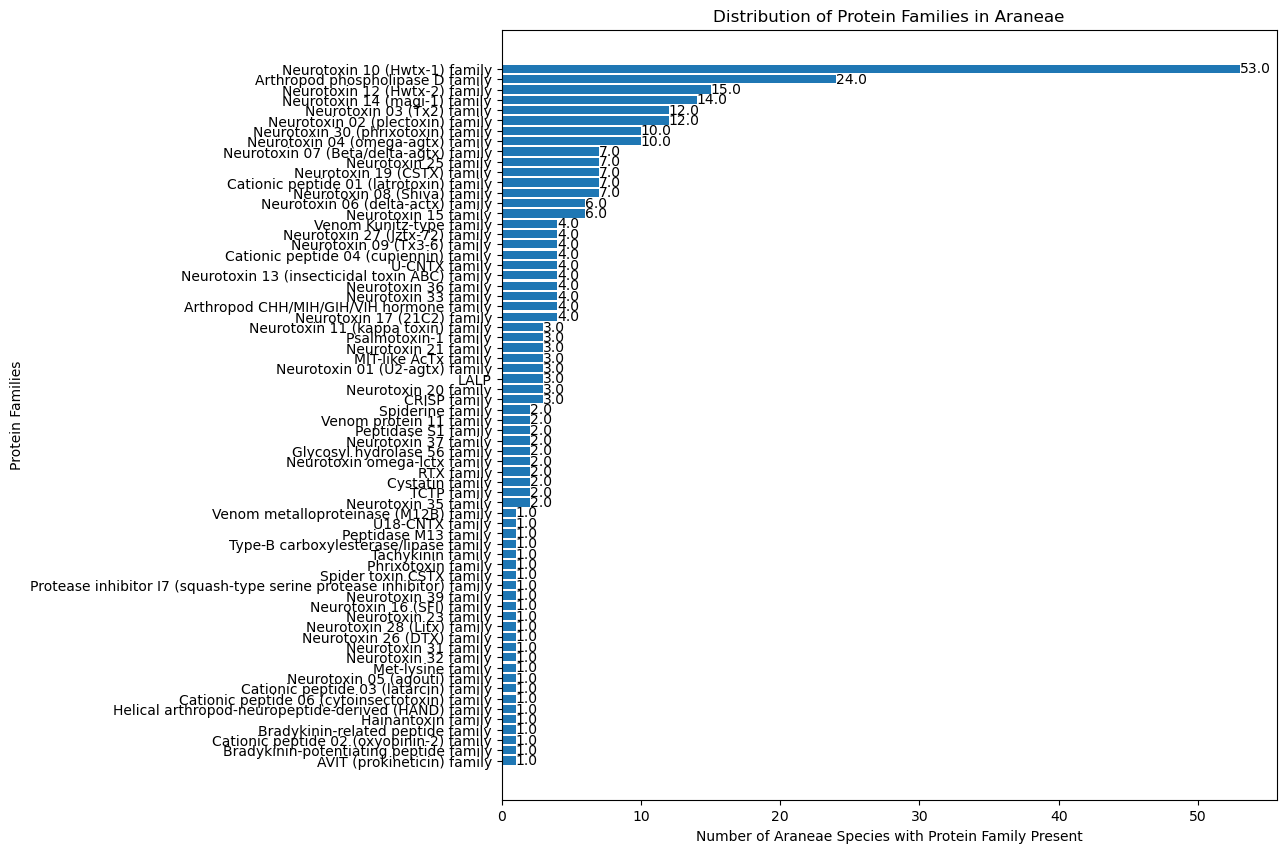

In [108]:
araneae_df = create_taxon_df('Araneae', organism_pivoted_df)
plot_taxon_prot_dist(araneae_df)

In [105]:
serpentes_df = create_taxon_df('Serpentes', organism_pivoted_df)
serpentes_df.head()

,5'-nucleotidase family,"AB hydrolase superfamily, Lipase family",AVIT (prokineticin) family,Bradykinin inhibitor peptide family,Bradykinin-potentiating peptide family,CREC family,CRISP family,Calmodulin family,Cathelicidin family,Crotamine-myotoxin family,...,TCTP family,Three-finger toxin family,True venom lectin family,Type-B carboxylesterase/lipase family,Venom Kunitz-type family,Venom complement C3 homolog family,Venom metalloproteinase (M12B) family,Venom waprin family,Waglerin family,venom vasodilator peptide
Serpentes,,,,,,,,,,,,,,,,,,,,,
Acanthophis antarcticus (Common death adder),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Acanthophis rugosus (Irian Jayan death adder),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Acanthophis sp. (strain Seram) (Seram death adder),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Agkistrodon bilineatus (Cantil) (Tropical moccasin),0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Agkistrodon conanti (Florida cottonmouth) (Agkistrodon piscivorus conanti),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


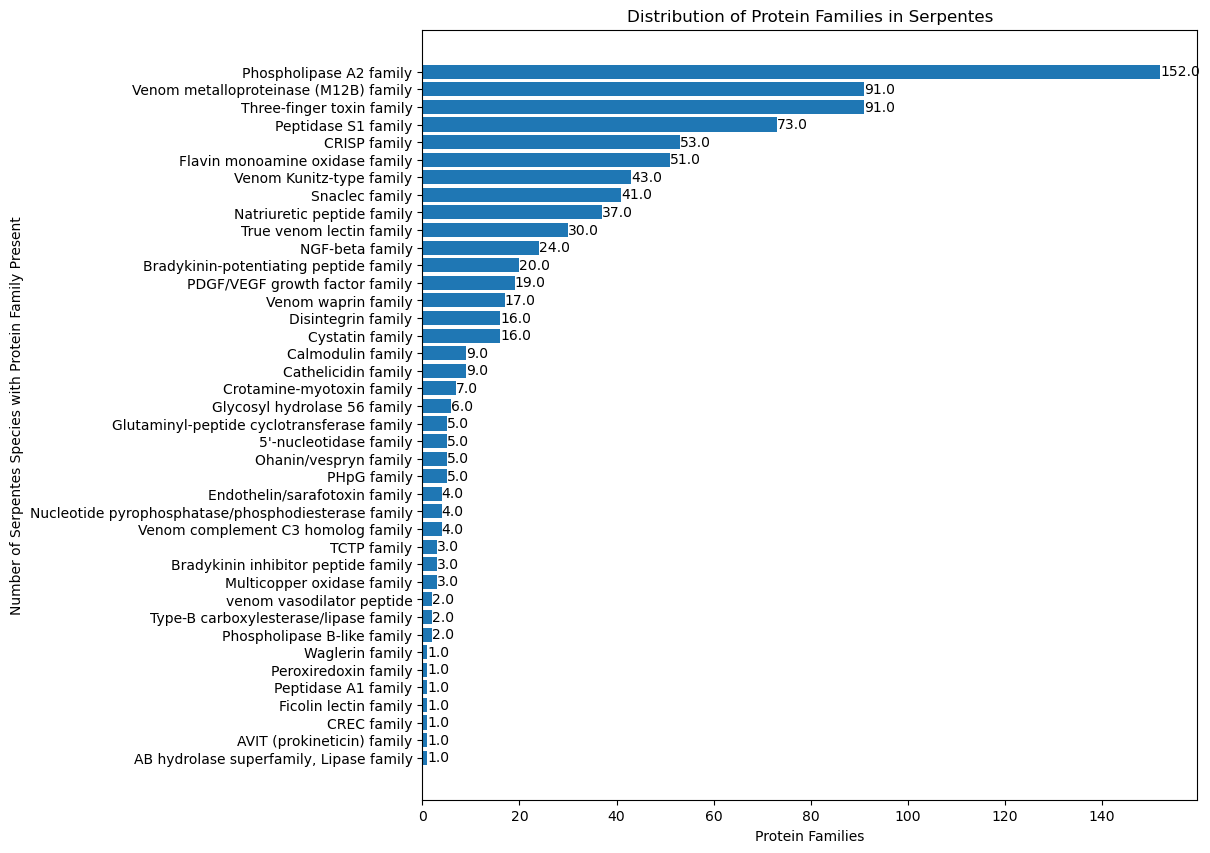

In [106]:
plot_taxon_prot_dist(serpentes_df)

In [58]:
serpentes_df = organism_pivoted_df[organism_pivoted_df['Taxon'] == 'Serpentes'].drop(columns=['Taxon'])

In [59]:
serpentes_df

,5'-nucleotidase family,"AB hydrolase superfamily, Lipase family",ATP:guanido phosphotransferase family,AVIT (prokineticin) family,Acrorhagin I family,Actinoporin family,Ant myrmeciitoxin-01 family,Ant venom allergen 2/4 family,Apamin,Arthropod CHH/MIH/GIH/VIH hormone family,...,Venom complement C3 homolog family,Venom metalloproteinase (M12B) family,Venom protein 11 family,Venom waprin family,Waglerin family,Xibalbin-1 family,Xibalbin-13 family,Xibalbin-2 family,Xylopin-like family,venom vasodilator peptide
Organism,,,,,,,,,,,,,,,,,,,,,
Acanthophis antarcticus (Common death adder),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Acanthophis rugosus (Irian Jayan death adder),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Acanthophis sp. (strain Seram) (Seram death adder),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Agkistrodon bilineatus (Cantil) (Tropical moccasin),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Agkistrodon conanti (Florida cottonmouth) (Agkistrodon piscivorus conanti),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vipera berus (Common European adder) (Coluber berus),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Vipera berus berus (Common viper),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Vipera nikolskii (Nikolsky's adder) (Vipera berus nikolskii),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
non_serpentes_prots = []
for col in serpentes_df.columns:
    if serpentes_df[col].sum() == 0 and col != 'Taxon':
        non_serpentes_prots.append(col)

non_serpentes_prots

['ATP:guanido phosphotransferase family',
 'Acrorhagin I family',
 'Actinoporin family',
 'Ant myrmeciitoxin-01 family',
 'Ant venom allergen 2/4 family',
 'Apamin',
 'Arthropod CHH/MIH/GIH/VIH hormone family',
 'Arthropod phospholipase D family',
 'Asilidin-1 family',
 'Asilidin-12 family',
 'Beta-defensin family',
 'Bradykinin-related peptide family',
 'CART family',
 'Caterpillar 1 family',
 'Caterpillar 11 family',
 'Caterpillar 2 family',
 'Caterpillar 3 family',
 'Caterpillar 4 family',
 'Caterpillar 8 family',
 'Caterpillar 9 family',
 'Cationic peptide 01 (latrotoxin) family',
 'Cationic peptide 02 (oxyopinin-2) family',
 'Cationic peptide 03 (latarcin) family',
 'Cationic peptide 04 (cupiennin) family',
 'Cationic peptide 06 (cytoinsectotoxin) family',
 'Cnidaria small cysteine-rich protein (SCRiP) family',
 'Conantokin',
 'ConoGAY family',
 'Conopeptide I2-like superfamily',
 'Conopeptide P-like superfamily',
 'Conophan family',
 'Conotoxin A superfamily',
 'Conotoxin B super

In [61]:
serpentes_df = serpentes_df.drop(columns=non_serpentes_prots)

In [80]:
serp_prot_count = serpentes_df.sum()
serp_prot_count = serp_prot_count.sort_values(ascending=True)
serp_prot_count.keys()

Index(['AB hydrolase superfamily, Lipase family', 'AVIT (prokineticin) family',
       'CREC family', 'Ficolin lectin family', 'Peptidase A1 family',
       'Peroxiredoxin family', 'Waglerin family',
       'Phospholipase B-like family', 'Type-B carboxylesterase/lipase family',
       'venom vasodilator peptide', 'Multicopper oxidase family',
       'Bradykinin inhibitor peptide family', 'TCTP family',
       'Venom complement C3 homolog family',
       'Nucleotide pyrophosphatase/phosphodiesterase family',
       'Endothelin/sarafotoxin family', 'PHpG family', 'Ohanin/vespryn family',
       '5'-nucleotidase family', 'Glutaminyl-peptide cyclotransferase family',
       'Glycosyl hydrolase 56 family', 'Crotamine-myotoxin family',
       'Cathelicidin family', 'Calmodulin family', 'Cystatin family',
       'Disintegrin family', 'Venom waprin family',
       'PDGF/VEGF growth factor family',
       'Bradykinin-potentiating peptide family', 'NGF-beta family',
       'True venom lectin fam

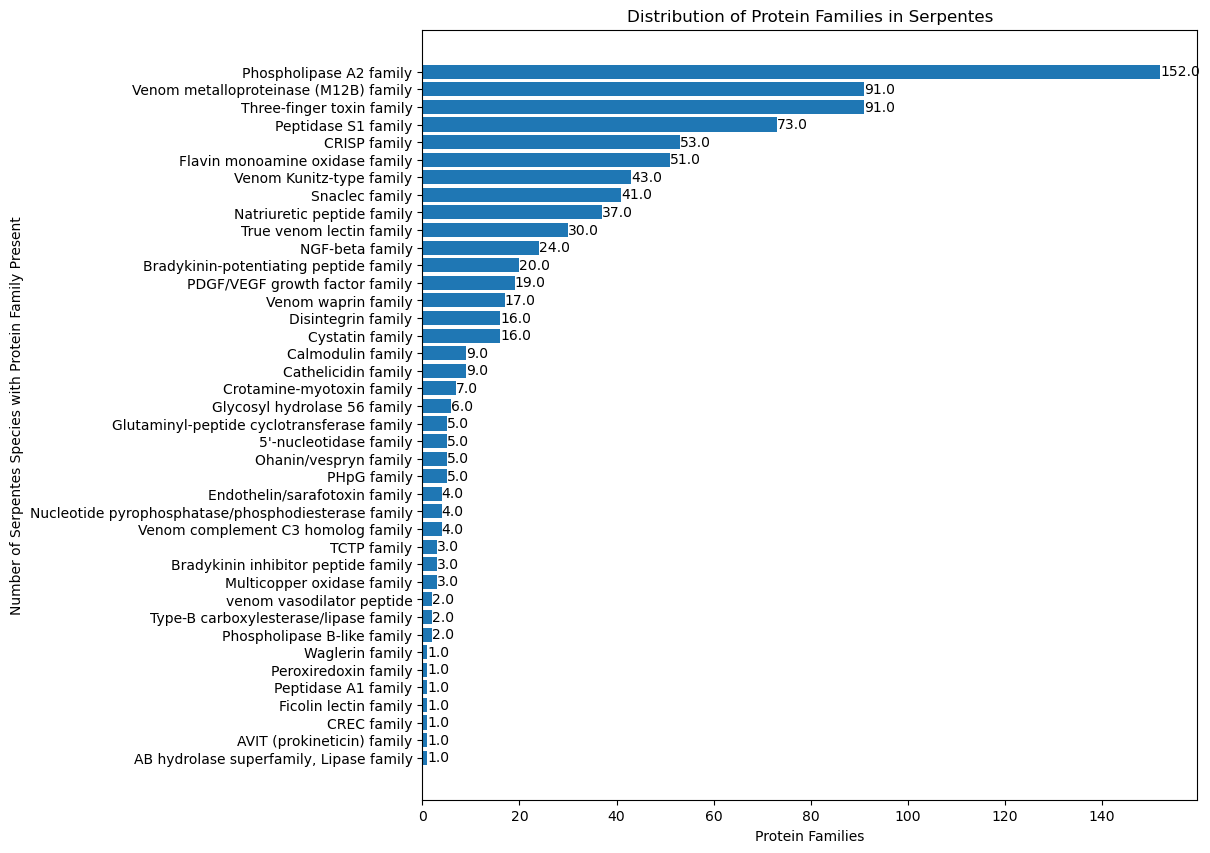

In [ ]:
fig, ax = plt.subplots()
hbars = ax.barh(serp_prot_count.keys(), serp_prot_count, height = 0.8)
ax.set_xlabel('Protein Families')
ax.set_ylabel('Number of Serpentes Species with Protein Family Present')
ax.set_title('Distribution of Protein Families in Serpentes')
ax.bar_label(hbars, labels=serp_prot_count)
fig.set_size_inches(10, 10);